**Importing the Dog vs Cat dataset from kaggle**

In [2]:
# Installing the Kaggle Library
!pip install kaggle

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 190MB/s]
100% 812M/812M [00:09<00:00, 94.1MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
# Extracting the compressed dataset of train
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import os
# COunting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [11]:
# Printing the name of images

file_names = os.listdir('/content/train')
print(file_names)

['dog.8722.jpg', 'dog.5663.jpg', 'dog.6857.jpg', 'dog.12310.jpg', 'dog.4968.jpg', 'cat.2497.jpg', 'dog.12355.jpg', 'dog.4745.jpg', 'dog.5114.jpg', 'cat.2747.jpg', 'dog.9731.jpg', 'cat.10510.jpg', 'cat.2150.jpg', 'dog.5204.jpg', 'dog.2502.jpg', 'dog.4444.jpg', 'cat.7116.jpg', 'dog.1152.jpg', 'dog.3096.jpg', 'dog.3353.jpg', 'cat.1657.jpg', 'cat.7028.jpg', 'cat.4467.jpg', 'dog.7096.jpg', 'dog.246.jpg', 'dog.2178.jpg', 'cat.6254.jpg', 'cat.1893.jpg', 'dog.1491.jpg', 'dog.8927.jpg', 'dog.5863.jpg', 'dog.2241.jpg', 'dog.59.jpg', 'dog.8243.jpg', 'dog.4847.jpg', 'dog.9519.jpg', 'dog.11757.jpg', 'cat.1548.jpg', 'dog.12322.jpg', 'dog.4943.jpg', 'cat.11142.jpg', 'dog.7160.jpg', 'cat.7563.jpg', 'dog.8639.jpg', 'cat.7076.jpg', 'dog.5429.jpg', 'dog.96.jpg', 'cat.1528.jpg', 'dog.1025.jpg', 'dog.9045.jpg', 'cat.4903.jpg', 'cat.933.jpg', 'cat.3687.jpg', 'cat.4893.jpg', 'dog.10263.jpg', 'dog.9090.jpg', 'cat.8275.jpg', 'cat.3206.jpg', 'dog.4191.jpg', 'dog.10434.jpg', 'dog.4603.jpg', 'dog.6482.jpg', 'dog.

**Importing the Dependencies**

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

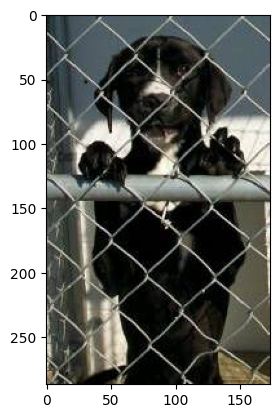

In [13]:
# Display the dog image
img = mpimg.imread('/content/train/dog.8722.jpg')
imgplot = plt.imshow(img)
plt.show()

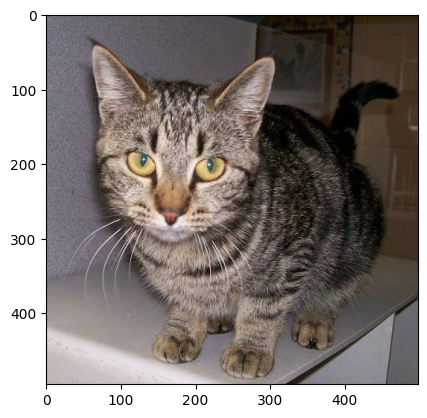

In [15]:
# Display the cat image
img = mpimg.imread('/content/train/cat.9030.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('/content/train/')

dog_count=0
cat_count=0

for name in file_names:

  if 'dog' in name:
    dog_count+=1
  elif 'cat' in name:
    cat_count+=1

print("Number of dog images: ", dog_count)
print("Number of cat images: ",cat_count)


Number of dog images:  12500
Number of cat images:  12500


**Resizing all the images**

In [21]:
# Creating a directory for resized Images

os.mkdir('/content/images_resized')

In [24]:
original_folder = '/content/train/'
resize_folder = '/content/images_resized/'

for i in range(2000):

  # Get the file name at ith position
  filename = os.listdir(original_folder)[i]

  # add it to the folder path
  img_path = original_folder+filename


  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  # Create a new path with new directory name with resized file name
  newImgPath = resize_folder+filename
  img.save(newImgPath)

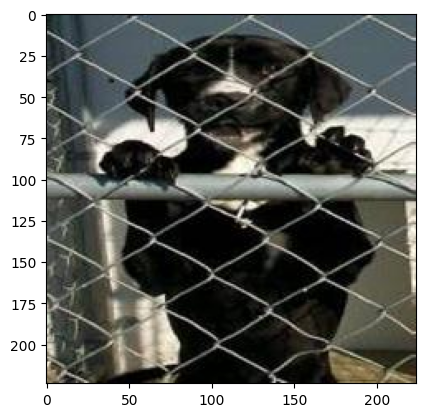

In [25]:
# Display the resized dog image
img = mpimg.imread('/content/images_resized/dog.8722.jpg')
imgplot = plt.imshow(img)
plt.show()

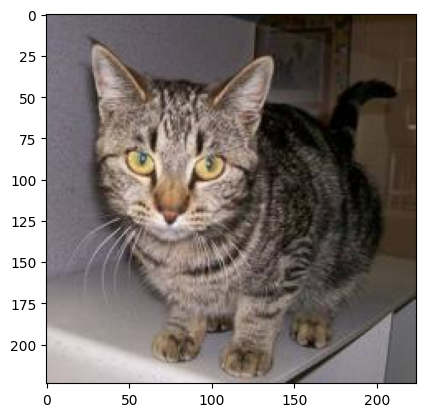

In [26]:
# Display the resized cat image
img = mpimg.imread('/content/images_resized/cat.9030.jpg')
imgplot = plt.imshow(img)
plt.show()

**Creating Labels for resized images of dogs and cat**

cat: 0

dog: 1

In [27]:
# Creating a for loop to assign labels
file_names = os.listdir('/content/images_resized/')
labels = []

for i in range(2000):

  file_name = file_names[i]

  if 'dog' in file_name:
    labels.append(1)
  else:
    labels.append(0)

In [30]:
print(file_names[0:10])
print(len(file_names))


['dog.8722.jpg', 'dog.5663.jpg', 'dog.6857.jpg', 'dog.12310.jpg', 'dog.4968.jpg', 'cat.2497.jpg', 'dog.12355.jpg', 'dog.4745.jpg', 'dog.5114.jpg', 'cat.2747.jpg']
2000


In [31]:
print(labels[0:10])

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0]


In [34]:
# Counting the number of cat images in resized images
labels.count(0)

979

In [35]:
# Counting the number of cat images in resized images
labels.count(1)

1021

In [37]:
# Counting the number of o and 1 using numpy
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


Converting all the resized image to numpy arrays

In [38]:
import cv2
import glob

In [39]:
image_directory = '/content/images_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [40]:
print(dog_cat_images)

[[[[ 48  52  40]
   [ 39  43  31]
   [ 33  36  21]
   ...
   [115  98  89]
   [115  97  90]
   [115  97  90]]

  [[ 42  46  34]
   [ 34  38  26]
   [ 30  33  18]
   ...
   [112  95  86]
   [113  96  87]
   [113  96  87]]

  [[ 48  52  40]
   [ 41  45  33]
   [ 38  41  26]
   ...
   [110  96  84]
   [112  96  84]
   [113  97  85]]

  ...

  [[104 133 148]
   [ 77 106 120]
   [ 70  97 111]
   ...
   [ 59  88 103]
   [ 66  92 108]
   [ 72  97 113]]

  [[119 146 160]
   [ 96 123 137]
   [ 87 113 127]
   ...
   [ 62  91 105]
   [ 66  93 107]
   [ 71  98 112]]

  [[ 64  91 105]
   [ 88 115 129]
   [111 137 149]
   ...
   [ 97 129 142]
   [ 78 105 119]
   [ 67  94 108]]]


 [[[188 202 201]
   [188 202 201]
   [189 203 202]
   ...
   [150 159 146]
   [149 158 145]
   [149 158 145]]

  [[188 202 201]
   [188 202 201]
   [189 203 202]
   ...
   [150 159 146]
   [149 158 145]
   [149 158 145]]

  [[188 202 201]
   [188 202 201]
   [189 203 202]
   ...
   [150 159 146]
   [150 159 146]
   [149 158

In [41]:
type(dog_cat_images)

numpy.ndarray

In [42]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [44]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


**Scaling the data**

In [47]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [48]:
print(X_train_scaled)

[[[[0.6        0.62352941 0.69803922]
   [0.60784314 0.63137255 0.70588235]
   [0.61176471 0.63529412 0.70980392]
   ...
   [0.74117647 0.75294118 0.76862745]
   [0.74117647 0.75294118 0.76862745]
   [0.74117647 0.75294118 0.76862745]]

  [[0.59607843 0.61960784 0.69411765]
   [0.60392157 0.62745098 0.70196078]
   [0.61176471 0.63529412 0.70980392]
   ...
   [0.7372549  0.74901961 0.76470588]
   [0.7372549  0.74901961 0.76470588]
   [0.74117647 0.75294118 0.76862745]]

  [[0.59215686 0.61568627 0.69019608]
   [0.6        0.62352941 0.69803922]
   [0.61176471 0.63921569 0.70588235]
   ...
   [0.73333333 0.74509804 0.76078431]
   [0.73333333 0.74509804 0.76078431]
   [0.7372549  0.74901961 0.76470588]]

  ...

  [[0.0627451  0.05098039 0.05882353]
   [0.0627451  0.05098039 0.05882353]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.21960784 0.35686275 0.49019608]
   [0.23529412 0.36078431 0.49803922]
   [0.22745098 0.35294118 0.49019608]]

  [[0.0627451  0.05098039 0.05882353]
   [0.0

**Building the Neural Network**

In [49]:
import tensorflow as tf
import tensorflow_hub as hub

In [50]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable=False)

In [51]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes) # Output layer

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [53]:
model.compile(

      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
      metrics = ['acc']
)

In [54]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.1474 - acc: 0.9469
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0633 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0475 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.0391 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 88s 2s/step - loss: 0.0328 - acc: 0.9906


In [55]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Data Loss: ', loss)
print('Test Data Accuracy: ', accuracy)

13/13 [==============================] - 19s 1s/step - loss: 0.0866 - acc: 0.9675
Test Data Loss:  0.08663953095674515
Test Data Accuracy:  0.9674999713897705


**Building a predictive system**

Path of the image to be predicted: /content/dog.jpg


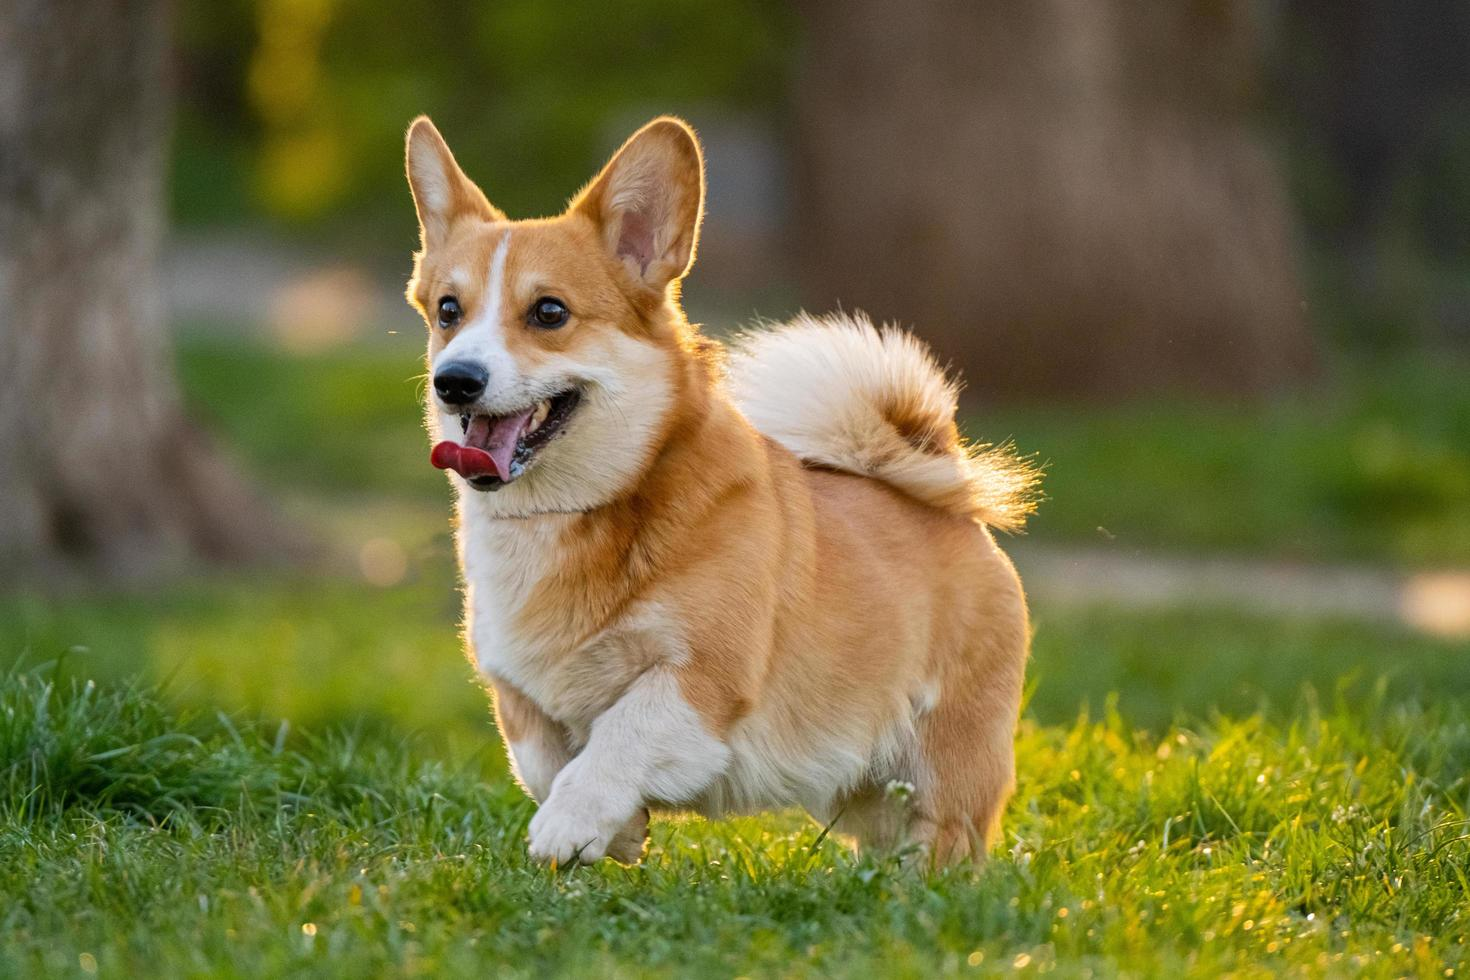

1/1 [==============================] - 0s 88ms/step
[[-1.795315  2.22851 ]]
1
The image is of Dog


In [58]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshapped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshapped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print("The image is of Cat")
else:
  print("The image is of Dog")